# remove outliers in benglore house price prediction dataset for price_per_sqft column
- use quantiles first
- then use std deviation of 4
- then use z score of 4 std deviation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv("bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [3]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

## removing outliers using percentile [0.01,0.9999]

In [5]:
min_thresh,max_thresh=df.price_per_sqft.quantile([0.01,0.9999])
min_thresh,max_thresh

(2549.0, 1779435.3672993227)

In [13]:
# get the outliers (total 129 outliers)
df[(df.price_per_sqft<min_thresh) | (df.price_per_sqft>max_thresh)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
20,Kengeri,1 BHK,600.0,1.0,15.00,1,2500
130,Electronic City,2 BHK,880.0,1.0,16.50,2,1875
169,Attibele,1 BHK,450.0,1.0,11.00,1,2444
247,Chandapura,2 BHK,800.0,1.0,20.00,2,2500
250,other,2 BHK,900.0,2.0,22.50,2,2500
...,...,...,...,...,...,...,...
12458,other,1 BHK,2559.0,1.0,55.00,1,2149
12463,Chandapura,1 BHK,410.0,1.0,10.00,1,2439
12532,Electronic City,2 BHK,1125.0,2.0,28.13,2,2500
12555,Kumaraswami Layout,2 BHK,1200.0,2.0,29.00,2,2416


In [14]:
# get the dataset without outliers
df_no_outlier=df[(df.price_per_sqft>min_thresh) & (df.price_per_sqft<max_thresh)]
df_no_outlier.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [15]:
df_no_outlier.price_per_sqft.describe()

count     13062.000000
mean       6886.850406
std        9835.769067
min        2550.000000
25%        4296.500000
50%        5467.000000
75%        7349.000000
max      672727.000000
Name: price_per_sqft, dtype: float64

## use z score on df_no_outlier to remove outliers , use std of 4 

In [16]:
df_no_outlier['zscore']=(df_no_outlier.price_per_sqft - df_no_outlier.price_per_sqft.mean()) / df_no_outlier.price_per_sqft.std()
df_no_outlier.head()

C:\Users\asus\AppData\Local\Temp\ipykernel_15680\2238502127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outlier['zscore']=(df_no_outlier.price_per_sqft - df_no_outlier.price_per_sqft.mean()) / df_no_outlier.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.324108
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.230978
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.262496
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.065257
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.268088


In [17]:
# verify the z score 
(3699 - df_no_outlier.price_per_sqft.mean()) / df_no_outlier.price_per_sqft.std()

np.float64(-0.3241078947871441)

In [29]:
# get the outliers 
df_no_outlier[(df_no_outlier.zscore>4) | (df_no_outlier.zscore<-4)].shape

(17, 8)

In [31]:
# get the new dataframe without outliers
df_no_outliers2=df_no_outlier[(df_no_outlier.zscore>-4) & (df_no_outlier.zscore<4)]
df_no_outliers2.shape

(13045, 8)

## use 4 std deviation to remove outliers on df_no_outlier

In [33]:
df_mean , std_deviation = df_no_outlier.price_per_sqft.mean() , df_no_outlier.price_per_sqft.std()
df_mean , std_deviation

(np.float64(6886.850405757158), np.float64(9835.769066504103))

In [34]:
df_mean - 4*std_deviation

np.float64(-32456.225860259252)

In [35]:
df_mean + 4*std_deviation

np.float64(46229.926671773566)

In [40]:
# get the outliers 
df_no_outlier[(df_no_outlier.price_per_sqft >46229.92) | (df_no_outlier.price_per_sqft<-32456.22)].shape

(17, 8)

In [41]:
# remove outliers 
df_no_outlier3=df_no_outlier[(df_no_outlier.price_per_sqft <46229.92) & (df_no_outlier.price_per_sqft>-32456.22)]
df_no_outlier3.shape

(13045, 8)

# conclusion
- using both Z score and std deviation of 4 , we are getting 17 outliers and 13045 

<Axes: xlabel='price_per_sqft', ylabel='Count'>

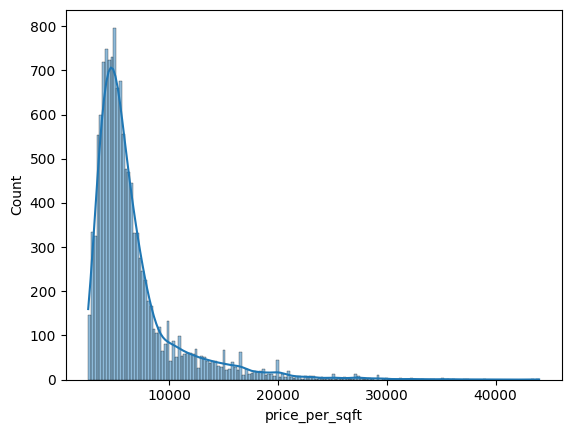

In [42]:
# plot the histogram for df_no_outlier3 
sns.histplot(df_no_outlier3.price_per_sqft,kde=True) # the distribution is left skewed 